In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification

In [4]:
from sklearn.model_selection import train_test_split
x,y=make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

In [5]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [23]:
##apply randomforest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
y_train_pred = rf_model.predict_proba(x_train)
print("y_train roc-auc: {}".format(roc_auc_score(y_train, y_train_pred[:,1])))
y_test_pred = rf_model.predict_proba(x_test)
print("rf test roc-auc: {}".format(roc_auc_score(y_test, y_test_pred[:,1])))

y_train roc-auc: 1.0
rf test roc-auc: 0.9832333333333333


In [26]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression()
log_classifier.fit(x_train, y_train)
ytrain_pred = log_classifier.predict_proba(x_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(x_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


In [27]:
# Adaboost classifer
from sklearn.ensemble import AdaBoostClassifier
ada_classifier = AdaBoostClassifier()
ada_classifier.fit(x_train, y_train)
y_train_pred = ada_classifier.predict_proba(x_train)
print("adaboost train roc-auc : {}". format(roc_auc_score(y_train, y_train_pred[:,1])))
y_test_pred = ada_classifier.predict_proba(x_test)
print("test rouc-auc: {}".format(roc_auc_score(y_test, y_test_pred[:,1])))

adaboost train roc-auc : 0.9975081174960356
test rouc-auc: 0.9826111111111111


In [29]:
# KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train, y_train)
ytrain_pred = knn_classifier.predict_proba(x_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(x_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


In [33]:
## select best threhsold for maxumum accuracy

pred = []
for model in [rf_model, log_classifier, ada_classifier, knn_classifier]:
    pred.append(pd.Series(model.predict_proba(x_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9850777777777778


In [ ]:

## calcualte roc curve
fpr, tpr, threhsolds = roc_curve(y_test, final_prediction)
threhsolds

In [47]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thresh in threhsolds:
    y_pred = np.where(final_prediction>thresh, 1, 0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))

accuracy_ls = pd.concat([pd.Series(threhsolds), pd.Series(accuracy_ls)], axis=1)
accuracy_ls.columns = ['threhsolds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,threhsolds,accuracy
31,0.447949,0.961667
32,0.444603,0.960000
30,0.452006,0.960000
27,0.542196,0.960000
25,0.556393,0.960000


In [50]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0,1],[0, 1], color='darkblue', linestyle= '--')
    plt.xlabel('false postive rate')
    plt.ylabel('true postive rate')
    plt.title('ROC curve')
    plt.legend()
    plt.show()

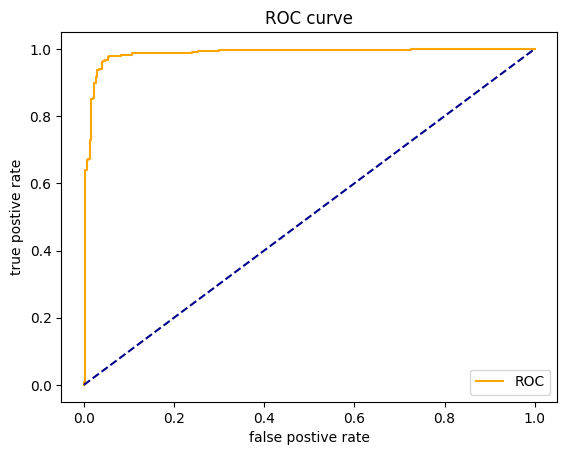

In [51]:
plot_roc_curve(fpr, tpr)